In [39]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [40]:
df = pd.read_csv('../MouseOB/AEH_times.csv', index_col=0)

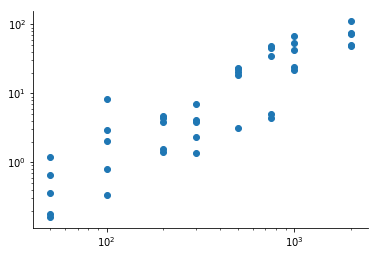

In [43]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df.N, df.time / 60);

In [47]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression(normalize=True)
lr.fit(np.log(df[['N']]), np.log(df[['time']]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [94]:
xx = np.linspace(3.5, np.log(20000))[:, None]

In [95]:
yy = lr.predict(xx)

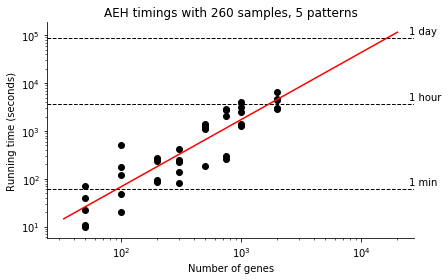

In [113]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df.N, df.time, c='k');
plt.plot(np.exp(xx), np.exp(yy), c='r')

plt.axhline(60, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 min', (25000, 60 * 1.1), va='bottom')

plt.axhline(60 * 60, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 hour', (25000, 60 * 60 * 1.1), va='bottom')

plt.axhline(60 * 60 * 24, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 day', (25000, 60 * 60 * 24 * 1.1), va='bottom')

plt.xlabel('Number of genes')
plt.ylabel('Running time (seconds)')

plt.title('AEH timings with 260 samples, 5 patterns');

plt.tight_layout();

In [112]:
# Hours for genome wide clustering into 5 types with 260 samples
np.exp(lr.predict(np.log(14000))) / 60 / 60

array([[ 19.55520315]])